**Required Data**

 H5 file :https://cf.10xgenomics.com/samples/xenium/preview/Xenium_FFPE_Human_Breast_Cancer_Rep1/Xenium_FFPE_Human_Breast_Cancer_Rep1_cell_feature_matrix.h5

 CSV file :  https://cf.10xgenomics.com/samples/xenium/preview/Xenium_FFPE_Human_Breast_Cancer_Rep1/Xenium_FFPE_Human_Breast_Cancer_Rep1_cells.csv.gz


In [ ]:
pip install scanpy

In [ ]:
pip install squidpy

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adata = sc.read_10x_h5(filename= "/content/drive/MyDrive/Xenium_FFPE_Human_Breast_Cancer_Rep1_cell_feature_matrix.h5")

In [ ]:
adata

AnnData object with n_obs × n_vars = 167782 × 313
    var: 'gene_ids', 'feature_types', 'genome'

In [ ]:
adata.obs_names

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '167773', '167774', '167775', '167776', '167777', '167778', '167779',
       '167780', '167781', '167782'],
      dtype='object', length=167782)

In [ ]:
df = pd.read_csv( "/content/drive/MyDrive/Xenium_FFPE_Human_Breast_Cancer_Rep1_cells.csv")

In [ ]:
df

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
0,1,377.663005,843.541888,154,0,0,154,110.361875,45.562656
1,2,382.078658,858.944818,64,0,0,64,87.919219,24.248906
2,3,319.839529,869.196542,57,0,0,57,52.561875,23.526406
3,4,259.304707,851.797949,120,0,0,120,75.230312,35.176719
4,5,370.576291,865.193024,120,0,0,120,180.218594,34.499375
...,...,...,...,...,...,...,...,...,...
167777,167778,7455.404785,5115.021094,238,1,0,239,219.956094,61.412500
167778,167779,7483.771045,5111.720703,80,0,0,80,38.427969,25.964844
167779,167780,7470.119580,5119.350366,406,0,0,406,287.690469,86.158125
167780,167781,7477.704004,5128.963086,120,0,0,120,235.670469,25.016563


In [ ]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [ ]:
df

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
1,1,377.663005,843.541888,154,0,0,154,110.361875,45.562656
2,2,382.078658,858.944818,64,0,0,64,87.919219,24.248906
3,3,319.839529,869.196542,57,0,0,57,52.561875,23.526406
4,4,259.304707,851.797949,120,0,0,120,75.230312,35.176719
5,5,370.576291,865.193024,120,0,0,120,180.218594,34.499375
...,...,...,...,...,...,...,...,...,...
167778,167778,7455.404785,5115.021094,238,1,0,239,219.956094,61.412500
167779,167779,7483.771045,5111.720703,80,0,0,80,38.427969,25.964844
167780,167780,7470.119580,5119.350366,406,0,0,406,287.690469,86.158125
167781,167781,7477.704004,5128.963086,120,0,0,120,235.670469,25.016563


let me provide more clarification on the contents of the metadata :

**cell_id**: unique identifier for each cell.

**x_centroid and y_centroid**: These columns contain the spatial coordinates of each cell within the tissue. x_centroid represents the x-coordinate, and y_centroid represents the y-coordinate of the cell's position within the tissue.

**transcript_counts**: the count of RNA transcripts detected in each cell

**control_probe_counts**: the count of control probes associated with each cell. Control probes are used to assess the quality and performance of the scRNA-seq experiment. A low count of control probes may indicate potential issues with data quality.

**control_codeword_counts**: Similar to control probes, this column contains the count of control codewords associated with each cell. Control codewords are used for quality control and data validation in scRNA-seq experiments.

**total_counts**: the total count of all RNA molecules (including both transcripts and control probes) associated with each cell. It is a sum of transcript_counts, control_probe_counts, and control_codeword_counts.

**cell_area**: This column represents the area of the segmented cell. It provides information about the physical size or extent of each cell within the tissue.

**nucleus_area**: This column represents the area of the cell's nucleus.The ratio of nucleus_area to cell_area can provide insights into the morphology of the cell.

In [ ]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [ ]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
1,1,377.663005,843.541888,154,0,0,154,110.361875,45.562656
2,2,382.078658,858.944818,64,0,0,64,87.919219,24.248906
3,3,319.839529,869.196542,57,0,0,57,52.561875,23.526406
4,4,259.304707,851.797949,120,0,0,120,75.230312,35.176719
5,5,370.576291,865.193024,120,0,0,120,180.218594,34.499375
...,...,...,...,...,...,...,...,...,...
167778,167778,7455.404785,5115.021094,238,1,0,239,219.956094,61.412500
167779,167779,7483.771045,5111.720703,80,0,0,80,38.427969,25.964844
167780,167780,7470.119580,5119.350366,406,0,0,406,287.690469,86.158125
167781,167781,7477.704004,5128.963086,120,0,0,120,235.670469,25.016563


Calculate quality control metrics


In [ ]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [ ]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.08700852649698224
Negative decoding count % : 0.005482476054877954


**Negative DNA Probe Count % (0.08700852649698224):** This percentage likely represents the proportion of DNA probes that have returned a negative result in a particular experiment or analysis. DNA probes are short sequences of DNA used to detect specific target sequences, and a negative result may indicate that the target sequence was not found or was present in very low quantities. The value you provided suggests that approximately 0.087% of the DNA probes yielded negative results in the analysis.

**Negative Decoding Count % (0.005482476054877954)**: This percentage likely represents the proportion of decoding attempts that have failed or resulted in negative outcomes in a decoding process. Decoding in this context could refer to various processes such as decoding data from a barcode, QR code, or other encoded information. The value you provided indicates that approximately 0.005% of the decoding attempts were unsuccessful or negative.

These percentages can provide insights into the quality and success of a scientific experiment, analysis, or data processing. Lower percentages for negative outcomes generally indicate more successful outcomes in the respective processes.


Next we plot the distribution of total transcripts per cell, unique transcripts per cell, area of segmented cells and the ratio of nuclei area to their cells

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

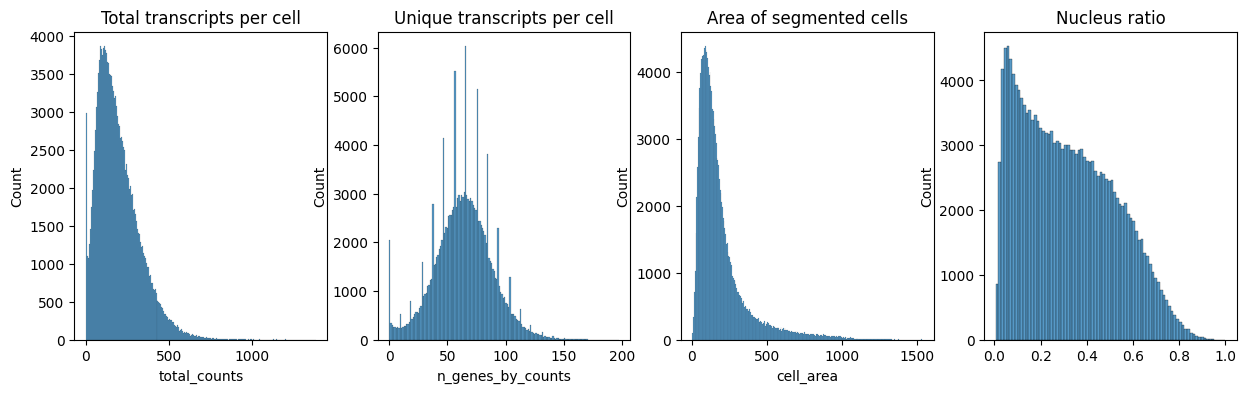

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [ ]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

Visualize annotation on UMAP and spatial coordinates


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


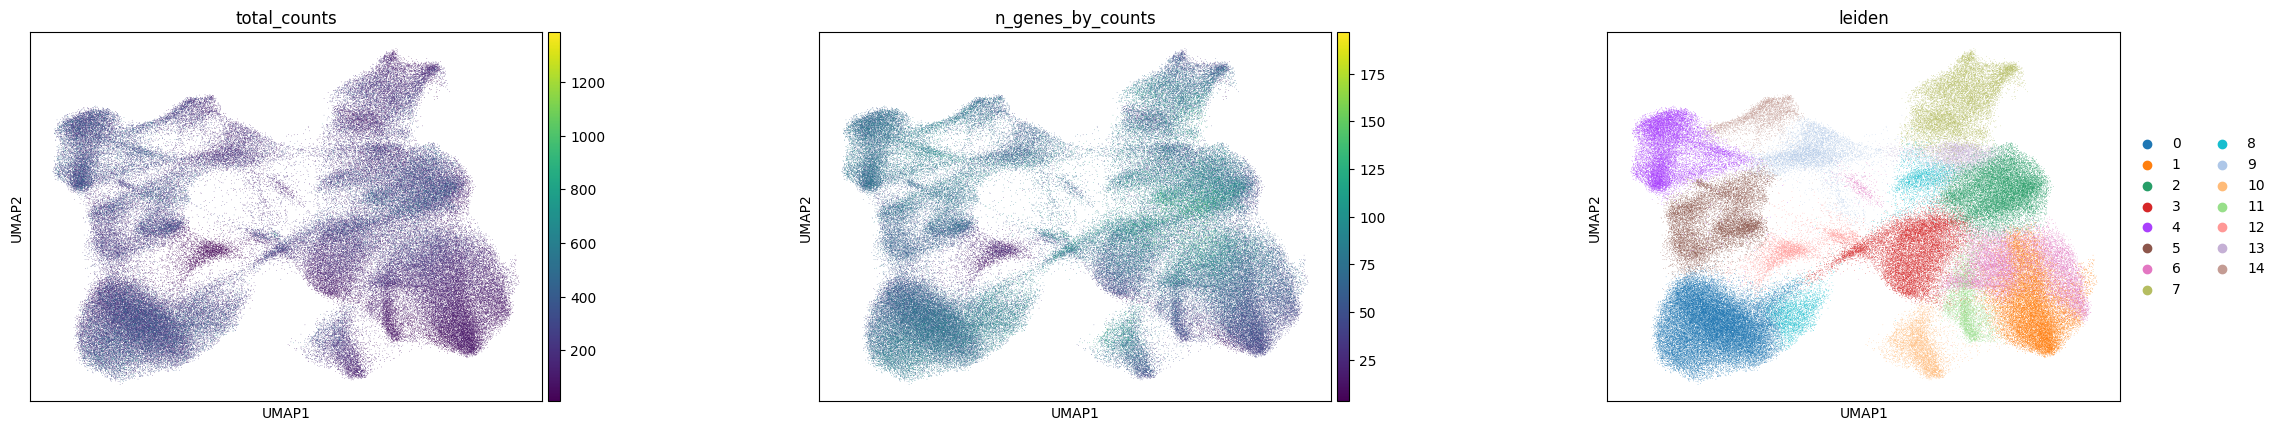

In [ ]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


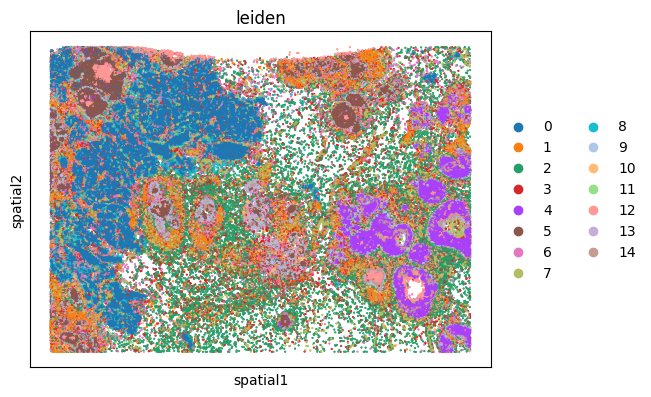

In [ ]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

**Computation of spatial statistics**
**Building the spatial neighbors graphs**

The scores calculated are closeness centrality, degree centrality and clustering coefficient with the following properties:

*closeness centrality* - measure of how close the group is to other nodes.

*clustering coefficien*t - measure of the degree to which nodes cluster together.

*degree centrality* - fraction of non-group members connected to group members.

All scores are descriptive statistics of the spatial graph.

This dataset contains Leiden cluster groups’ annotations in anndata.AnnData.obs, which are used for calculation of centrality scores.

First, we need to compute a connectivity matrix from spatial coordinates to calculate the centrality scores. We can use** squidpy.gr.spatial_neighbors** for this purpose. We use **the coord_type="generic"** based on the data and the neighbors are classified with Delaunay triangulation by specifying **delaunay=True**.

In [ ]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

Compute centrality scores

In [ ]:
sq.gr.centrality_scores(adata, cluster_key="leiden")

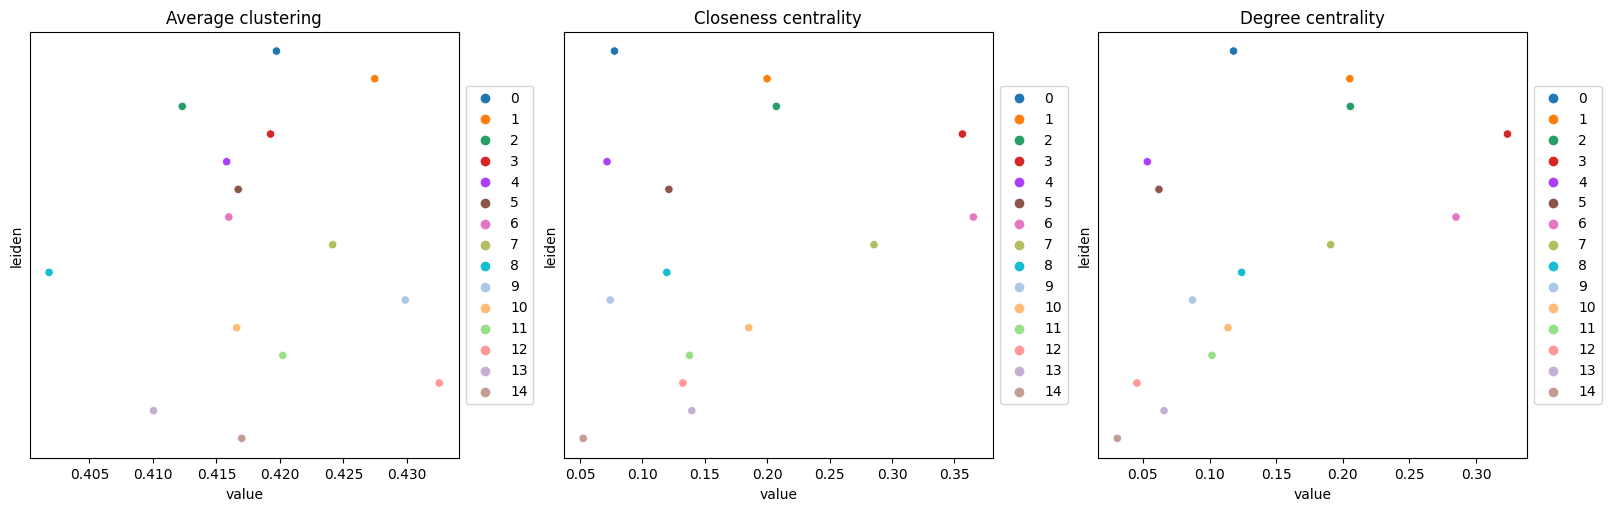

In [ ]:
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(16, 5))

**Compute co-occurrence probability**


The co-occurrence score is defined as:

(1)\[\begin{equation} \frac{p(exp|cond)}{p(exp)} \end{equation}\]
where \(p(exp|cond)\) is the conditional probability of observing a cluster \(exp\) conditioned on the presence of a cluster \(cond\), whereas \(p(exp)\) is the probability of observing \(exp\) in the radius size of interest. The score is computed across increasing radii size around each cell in the tissue.

We can compute the co-occurrence score with squidpy.gr.co_occurrence. Results of co-occurrence probability ratio can be visualized with squidpy.pl.co_occurrence. The ‘3’ in the \(\frac{p(exp|cond)}{p(exp)}\) represents a Leiden clustered group.

We can further visualize tissue organization in spatial coordinates with squidpy.pl.spatial_scatter, with an overlay of the expressed genes which were colored in consonance with the Leiden clusters.

computing co-occurrence probability in spatial scRNA-seq analysis is a way to uncover spatial relationships between cell clusters within a tissue. While it doesn't directly measure gene expression, it provides valuable spatial context that can be integrated with gene expression data to gain insights into the functional significance of spatial patterns and the potential co-regulation of genes in specific spatial contexts.

The link between co-occurrence probability analysis and gene expression lies in the biological interpretation of the results.
 it can be used in conjunction with gene expression data to draw meaningful conclusions:
 1-Correlation with Gene Expression:you can correlate the observed spatial patterns with the expression of specific genes. This can help identify genes that are co-expressed in cells with certain spatial preferences.
 2-Functional Significance: For example, if two cell clusters tend to co-occur and also express specific genes, it suggests that those genes may play a role in mediating interactions between the cell types.
 3-Spatial Heterogeneity:can help you understand how spatial heterogeneity in gene expression relates to the spatial distribution of cell clusters.

In [ ]:
adata_subsample = sc.pp.subsample(adata, fraction=0.5, copy=True)

  0%|          | 0/861 [00:00<?, ?/s]

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


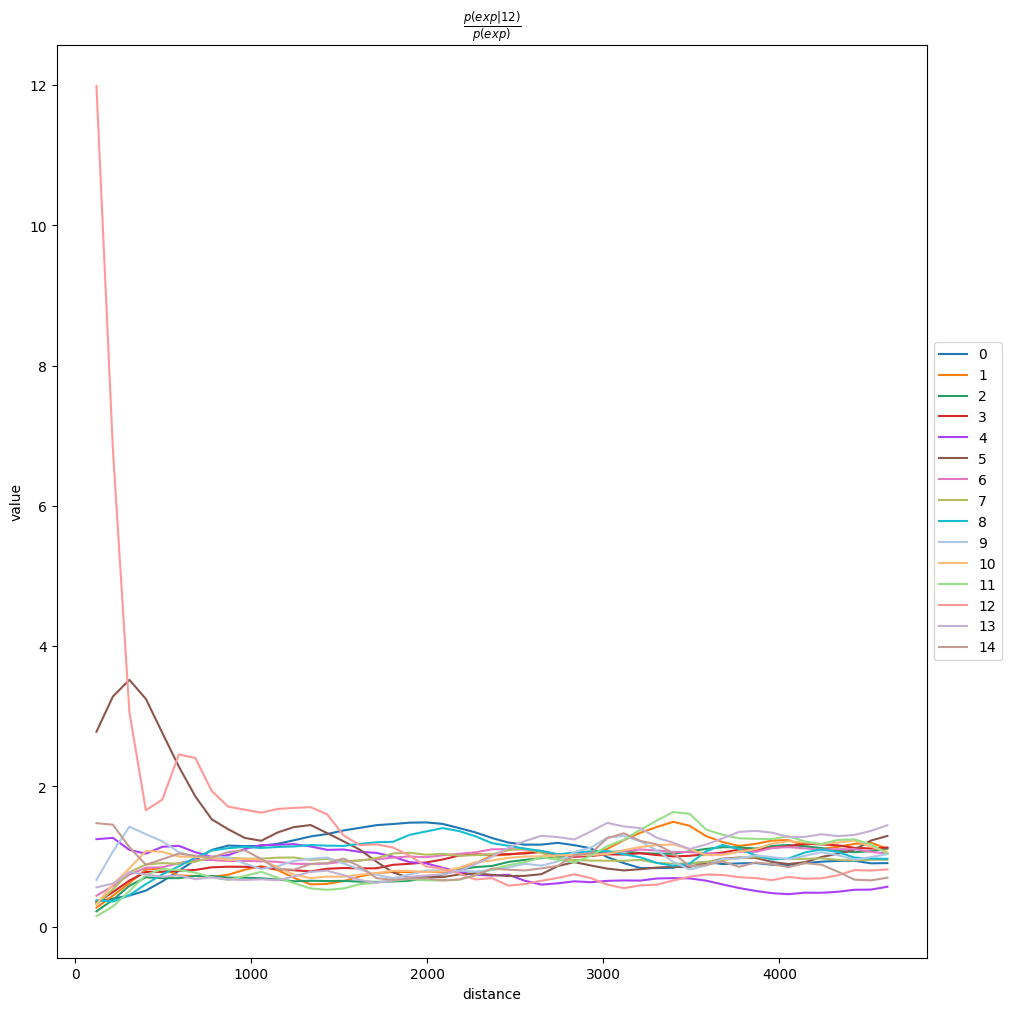

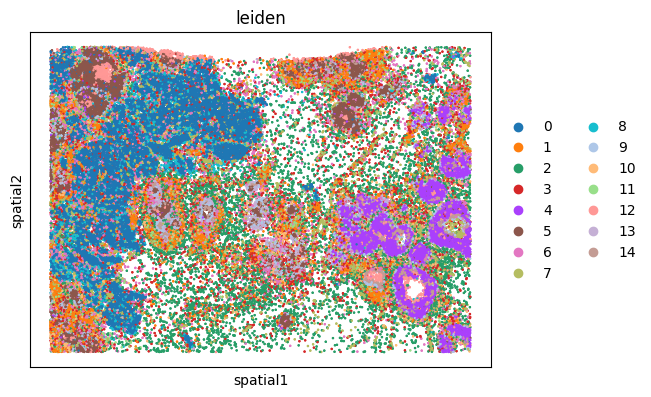

In [ ]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
    clusters="12",
    figsize=(10, 10),
)
sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    shape=None,
    size=2,
)

**Neighbors enrichment analysi**s

It calculates an enrichment score based on proximity on the connectivity graph of cell clusters. The number of observed events is compared against \(N\) permutations and a z-score is computed.

This dataset contains cell type annotations in anndata.Anndata.obs which are used for calculation of the neighborhood enrichment. We calculate the neighborhood enrichment score with squidpy.gr.nhood_enrichment

In [ ]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

  0%|          | 0/1000 [00:00<?, ?/s]

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


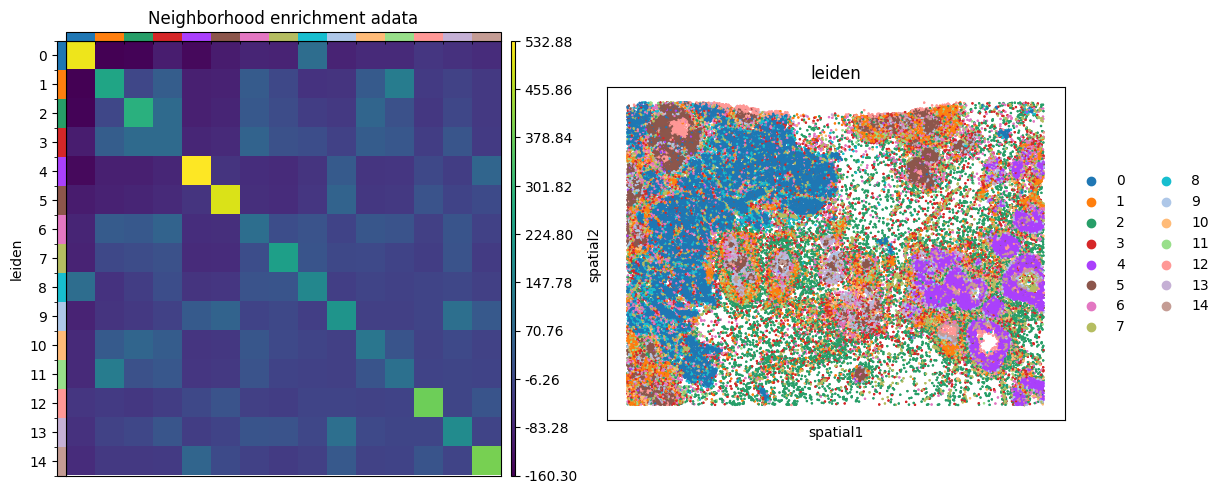

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_subsample, color="leiden", shape=None, size=2, ax=ax[1])

**Co-occurrence Probability Analysis:**

Identifies spatial patterns in cell cluster distribution.
Determines if specific cell clusters tend to co-occur spatially.

**Neighbors Enrichment Analysis:**

Assesses enrichment or depletion of cell types near each other.
Focuses on functional and spatial relationships between cell types within the tissue.

**Compute Moran’s I score**


The Moran’s I global spatial auto-correlation statistics evaluates whether features (i.e. genes) shows a pattern that is clustered, dispersed or random in the tissue are under consideration.

We can compute the Moran’s I score with squidpy.gr.spatial_autocorr and mode = 'moran'. We first need to compute a spatial graph with squidpy.gr.spatial_neighbors. We will also subset the number of genes to evaluate.

In [ ]:
sq.gr.spatial_neighbors(adata_subsample, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subsample,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subsample.uns["moranI"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
KRT7,0.696668,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.009933
SCD,0.671975,0.0,0.000004,0.0,0.009901,0.000006,0.0,0.0,0.009933
FOXA1,0.659014,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.009933
FASN,0.653400,0.0,0.000004,0.0,0.009901,0.000008,0.0,0.0,0.009933
EPCAM,0.641954,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.009933
TACSTD2,0.638978,0.0,0.000004,0.0,0.009901,0.000008,0.0,0.0,0.009933
CEACAM6,0.631554,0.0,0.000004,0.0,0.009901,0.000008,0.0,0.0,0.009933
ERBB2,0.628083,0.0,0.000004,0.0,0.009901,0.000008,0.0,0.0,0.009933
KRT8,0.619555,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.009933
LUM,0.593700,0.0,0.000004,0.0,0.009901,0.000006,0.0,0.0,0.009933


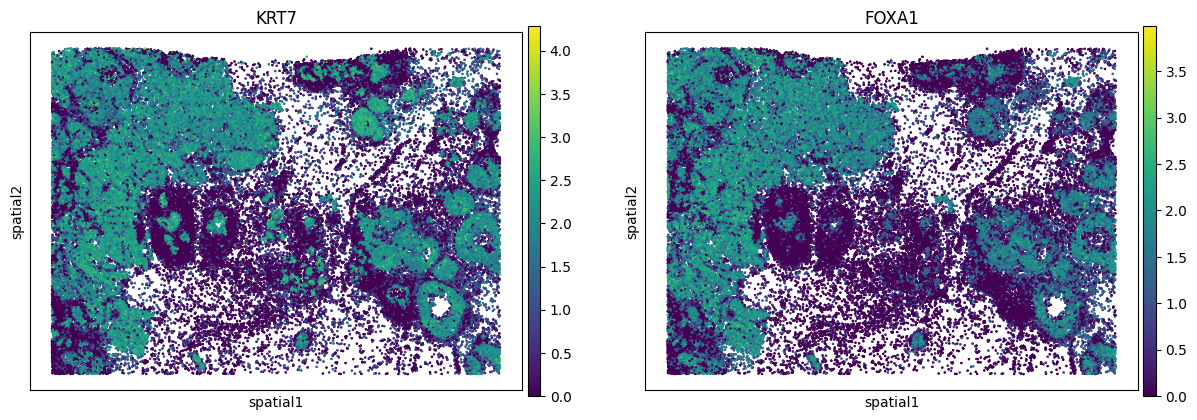

In [ ]:
sq.pl.spatial_scatter(
    adata_subsample,
    library_id="spatial",
    color=[
        "KRT7",
        "FOXA1",
    ],
    shape=None,
    size=2,
    img=False,
)